# Loading and pre-processing
Let's load and have a first look at the raw data

In [1]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as pl

In [2]:
train_data = read_csv('../data/train.csv')

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


What are the features that compose the dataset

In [4]:
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Before continuing, let's just define the meaning of the available features and variables, for clarity:

| Variable     | Definition                                 | Type | Key                               |
|--------------|--------------------------------------------|------|-----------------------------------|
| PassengerId  | ID of the passenger                        |  *   |                                   |
| Name         | passenger name                             |  *   |                                   |
| Survived     | passenger survived                         |  Categorical    | 0=No, 1=Yes                       |
| Pclass       | Ticket class                               |  Categorical (ordinal)   | 1=1st, 2=2nd, 3=3rd               |
| Sex          | passenger's gender                         |  Categorical    | male, female                      |
| Age          | passenger's age                            |  Numerical (continuous)      | (in years)                        |
| SibSp        | # of siblings / spouses aboard the Titanic |  Numerical (discrete)     |                                   |
| Parch        | # of parents / children aboard the Titanic |  Numerical (discrete)    |                                   |
| Ticket       | Ticket number                              |  *              |                                   |
| Fare         | Paid fare                                  |  Numerical (continuous)     |                                   |
| Cabin        | cabin number (if applicable)               |  *    |                                   |
| Parch        | # of parents / children aboard the Titanic |  Numerical (discrete)     |                                   |
| Embarked     | Port of embarcation                        |  Categorical    | C=Cherbourg, Q=Queenstown, S=Southampton|

Note that features marked with * are not usable (see below)

## Splitting the dataset 
Not all the information contained in the dataset is useful for our purposes so it is worth parsing the data to extract only the relevant features. For example, the name, ticket number or the cabin number are not usable features, since they are unique to each passenger. 

This can be done using pandas `drop` method

In [5]:
clean_train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

Additionally, the survival field is the target label, so it should be separated.

In [6]:
target_train = train_data.Survived

clean_train_data = clean_train_data.drop('Survived', axis=1)
clean_train_data

# Save as numpy_array for later use
np_matrix_target_train = target_train.to_numpy()
np.save('target_train.npy', target_train)

# Exploratory analysis
To begin having a feel for the data, let's look at some of its statistical properties.

## Descriptive statistics
Let's start by having a look at the characteristics of the passangers. It's important keeping in mind that the standard descriptive statistics are only applicable for numerical features:

In [7]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
clean_train_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


We can use a boxplot to show the shape of the distribution, its central value, and its variability.

[Text(0, 0, 'Pclass'),
 Text(0, 0, 'Age'),
 Text(0, 0, 'SibSp'),
 Text(0, 0, 'Parch'),
 Text(0, 0, 'Fare')]

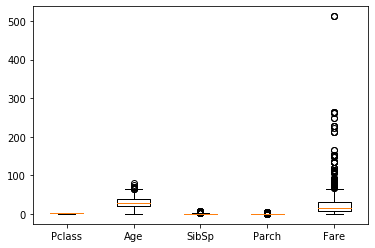

In [8]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

fig, ax = pl.subplots()
ax.boxplot([clean_train_data['Pclass'], clean_train_data['Age'][~np.isnan(clean_train_data['Age'])], clean_train_data['SibSp'], clean_train_data['Parch'], clean_train_data['Fare']])
labels = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
ax.set_xticklabels(labels)

Looking at the distribution with histograms

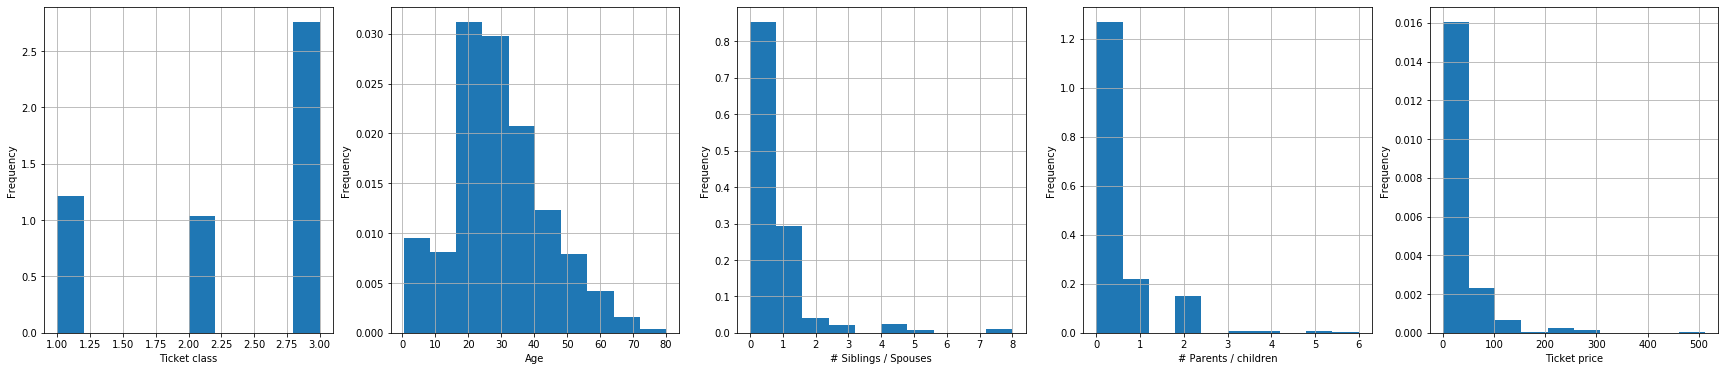

In [9]:
fig = pl.figure(figsize=(30, 6))
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

ax1.hist(clean_train_data['Pclass'], density=True)
ax1.set_xlabel('Ticket class')
ax1.set_ylabel('Frequency')
ax1.grid()

ax2.hist(clean_train_data['Age'][~np.isnan(clean_train_data['Age'])], density=True)
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.grid()

ax3.hist(clean_train_data['SibSp'], density=True)
ax3.set_xlabel('# Siblings / Spouses')
ax3.set_ylabel('Frequency')
ax3.grid()

ax4.hist(clean_train_data['Parch'], density=True)
ax4.set_xlabel('# Parents / children')
ax4.set_ylabel('Frequency')
ax4.grid()

ax5.hist(clean_train_data['Fare'], density=True)
ax5.set_xlabel('Ticket price')
ax5.set_ylabel('Frequency')
ax5.grid()

What about the categorical features?

In [10]:
#describe categorical features
clean_train_data.describe(include=[np.object])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


### Feature correlations
Before continuing, it is informative to evaluate how the features relate to each other. It is particularly important to evaluate how the different features in the training set correlate with Survival (the target), as this informs us how predictive each feature is.

/home/neuro/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


array([[ 1.        , -0.36922602,  0.08308136,  0.01844267, -0.54949962],
       [-0.36922602,  1.        , -0.30824676, -0.18911926,  0.09606669],
       [ 0.08308136, -0.30824676,  1.        ,  0.4148377 ,  0.15965104],
       [ 0.01844267, -0.18911926,  0.4148377 ,  1.        ,  0.21622494],
       [-0.54949962,  0.09606669,  0.15965104,  0.21622494,  1.        ]])

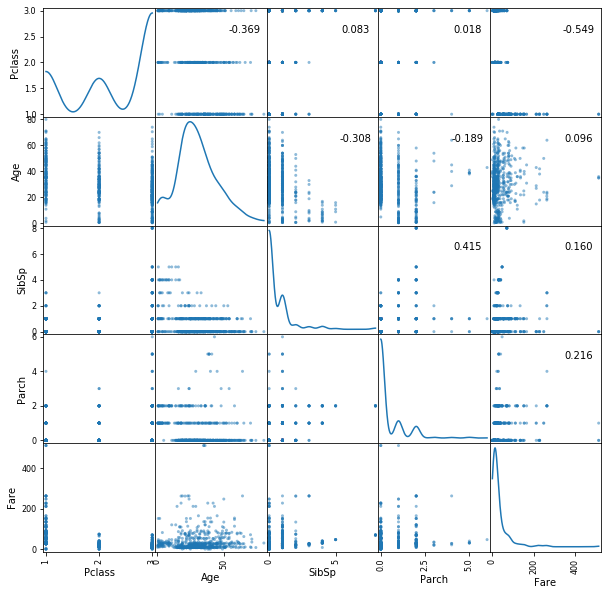

In [11]:
#kde = kernel density estimation - NaN values are extrapolated and approximated with kde
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html

axes = scatter_matrix(clean_train_data, alpha=0.5, figsize=(10, 10), diagonal='kde')
corr = clean_train_data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
corr

The features that are more negatively correlated are the ticket class and fare paid and, to a lesser extent, the ticket class and the age. How do the features correlate with the outcome (survival)?

In [12]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
train_data[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.000000
9,5.00,1.000000
79,63.00,1.000000
68,53.00,1.000000
1,0.67,1.000000
17,13.00,1.000000
16,12.00,1.000000
87,80.00,1.000000
2,0.75,1.000000
4,0.92,1.000000


In [14]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [16]:
train_data[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
83,12.6500,1.0
81,12.4750,1.0
79,12.2875,1.0
194,56.9292,1.0
77,12.0000,1.0


## Calculating correlation coefficients of each feature
    np.corrcoef(feature,target)

With this analysis, we can see that Parch and Fare have the strongest correlation with the target:

In [17]:
np.corrcoef(clean_train_data['Pclass'], target_train)

array([[ 1.        , -0.33848104],
       [-0.33848104,  1.        ]])

In [18]:
np.corrcoef(clean_train_data['Age'][~np.isnan(clean_train_data['Age'])], target_train[~np.isnan(clean_train_data['Age'])])

array([[ 1.        , -0.07722109],
       [-0.07722109,  1.        ]])

In [19]:
np.corrcoef(clean_train_data['SibSp'], target_train)

array([[ 1.       , -0.0353225],
       [-0.0353225,  1.       ]])

In [20]:
np.corrcoef(clean_train_data['Parch'], target_train)

array([[1.        , 0.08162941],
       [0.08162941, 1.        ]])

In [21]:
np.corrcoef(clean_train_data['Fare'], target_train)

array([[1.        , 0.25730652],
       [0.25730652, 1.        ]])

To further analyse and later use the categorical features, we need to convert them to ordinal:

In [22]:
#conversion to ordinal using map() and astype()
clean_train_data['Embarked'] = clean_train_data['Embarked'].map({'S': 1, 'Q': 2, 'C': 3})
clean_train_data['Sex'] = clean_train_data.Sex.astype("category").cat.codes

clean_train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1.0
1,1,0,38.0,1,0,71.2833,3.0
2,3,0,26.0,0,0,7.9250,1.0
3,1,0,35.0,1,0,53.1000,1.0
4,3,1,35.0,0,0,8.0500,1.0
5,3,1,NaN,0,0,8.4583,2.0
6,1,1,54.0,0,0,51.8625,1.0
7,3,1,2.0,3,1,21.0750,1.0
8,3,0,27.0,0,2,11.1333,1.0
9,2,0,14.0,1,0,30.0708,3.0


Now we can re-evaluate how the different features correlate with the outcome, including the categorical features:

[Text(0, 0, 'Pclass'),
 Text(0, 0, 'Sex'),
 Text(0, 0, 'Age'),
 Text(0, 0, 'SibSp'),
 Text(0, 0, 'Parch'),
 Text(0, 0, 'Fare'),
 Text(0, 0, 'Embarked')]

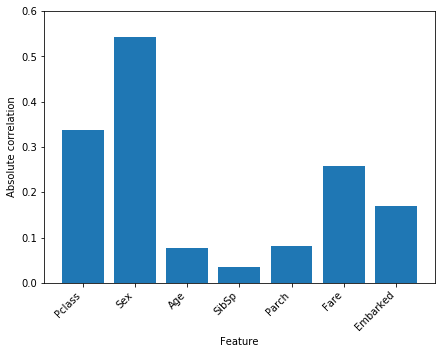

In [23]:
corr_coef = []
for label in clean_train_data.columns.values:
    corr_coef.append(np.abs(np.corrcoef(clean_train_data[label][~np.isnan(clean_train_data[label])], target_train[~np.isnan(clean_train_data[label])])[0, 1]))

fig = pl.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
ax.bar(np.arange(0, len(clean_train_data.columns.values)), height=corr_coef, align='center')
ax.set_ylim([0., 0.6])
ax.set_ylabel('Absolute correlation')
ax.set_xlabel('Feature')
ax.set_xticks(np.arange(0, len(clean_train_data.columns.values)))
ax.set_xticklabels(clean_train_data.columns.values, rotation = 45, ha="right")

The results of this analysis demonstrate that the Sex feature is the most correlated with the passenger's survival, followed by the ticked class (Pclass) and the Fare paid (as we have seen these two features are highly correlated).

## Missing values strategies :

In [24]:
# Fill Age column NaN values with the median
clean_train_data['Age'].fillna((clean_train_data['Age'].median()), inplace=True)
# Fill Embarked column Nan values with zero
clean_train_data['Embarked'].fillna(value=0, inplace=True)

# Since the printing doesn't show us the entire DF, let's validate if there's still any NaN value in any of the columns:

#np.any(np.isnan(clean_train_data['Pclass']))
#np.any(np.isnan(clean_train_data['Sex']))
#np.any(np.isnan(clean_train_data['Age']))
#np.any(np.isnan(clean_train_data['Parch']))
#np.any(np.isnan(clean_train_data['Fare']))
#np.any(np.isnan(clean_train_data['Embarked']))

# After cleaning clean_train_data['Age'], np.any(np.isnan(clean_train_data['Embarked'])) returned true, which means the column
# still had NaN values. For that reason, we cleant it.

# Export the clean data as numpy_array, so it can be used in training
np_matrix_clean_train_data = clean_train_data.to_numpy()
np_matrix_clean_train_data

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  1.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  3.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  1.    ],
       ...,
       [ 3.    ,  0.    , 28.    , ...,  2.    , 23.45  ,  1.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  3.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  2.    ]])

In [25]:
#Saving the numpy array
np.save('cleantraindata.npy', np_matrix_clean_train_data)


# Additional notes

## Feature engineering
This dataset can be enriched in multiple ways, taking into consideration the meaning of the features (this is adviced in the Kaggle challenge description, feature engineering). For example:
* Title - the name of the passengers can be used to extract a new feature based on the title used by the person (Mr., Mrs., Dr., Lady, Countess, ...) 
* Family size - combining the number of siblings, spouses (Sbsp), parents and children (Parch) can generate a new feature of total family size
* Demographics - grouping the ages into intervals (converting it from a continuous numerical feature to an ordinal categorical one) can give rise to a new feature
* Cabine feature - having a map of the Titanic, the number of the cabin could be correlated with its location in the boat, and by that could be established a relation between the target (survival) and the location of the cabine.

## Resources
Additional, extended solutions for the challenge were found here:
* [Example solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
* [Best classifiers](https://www.kaggle.com/sinakhorami/titanic-best-working-classifier)

Pandas 
* [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)

Matplotlib
* [Matplotlib Documentation](https://matplotlib.org/3.1.0/contents.html)

StackOverflow
* [Filling DF NaN values](https://stackoverflow.com/questions/13295735/how-can-i-replace-all-the-nan-values-with-zeros-in-a-column-of-a-pandas-datafra)
* [How to save and load numpy_arrays](https://stackoverflow.com/questions/28439701/how-to-save-and-load-numpy-array-data-properly)

# Binary classification task
After having processed the data, we will use the clean dataset to evaluate the accuracy of different classifiers in predicting the survival of the passengers based on the considered features. We will use the standard libraries from scikit-learn.

## The datasets
For this project, we do not have the ground truth for the test set, so we will use only the training set for the evaluation. The first step is to import the clean data and the target labels. The train data should be provided as a matrix (numpy array) with dimensions $n_{samples} \times n_{features}$, and the targets are a binary vector of size $n_{samples}$.

In [26]:
import matplotlib.pyplot as pl
import numpy as np

train_data = np.load('cleantraindata.npy')
target_labels = np.load('target_train.npy')

## Splitting the data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, target_labels, test_size=0.3)
#print(train_data.shape, target_labels.shape)
#print(X_train.shape, X_test.shape)

## The classifiers
There are lots of different models that can be used to solve this problem. This should be instructed by the structure of the dataset and the characteristics of the features considered. 
Alternatively (or additionally), it is always helpful (if computing resources allow it) to do a brute-force search, where we compare the accuracy of a large number of applicable models. 
We will use this option since the dataset is rather small ($n_{samples}=891$, $n_{features}=7$) and apply the following classifiers (see e.g. [binary classification](https://en.wikipedia.org/wiki/Binary_classification)):

* Logistic Regression
* Decision Trees
* Support Vector Machines 
* Linear and Quadratic Discriminant Analysis
* Random Forest 
* K-Nearest Neighbors
* Naive Bayes 
* Artificial Neural Networks - multi-layer perceptron

All of these models have a standard implementation in scikit-learn. Let's import all the relevant models:

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

/home/neuro/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


We start by initializing all the classifiers. The results can be very sensitive to the initialization parameters and, for each specific model, results can be improved by these choices. Additionally, some models can use some preliminary hyper-parameter tuning (e.g. nonlinear SVM), which can be done by grid-search and cross-validation.
For simplicity, we will use standard parameters:

In [29]:
classifiers = [
    LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr'), 
    DecisionTreeClassifier(max_depth=5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    KNeighborsClassifier(3),
    GaussianNB(),
    MLPClassifier(alpha=1, max_iter=1000),
]

classifier_names = [
    "Logistic Regression", 
    "Decision Tree", 
    "Linear SVM", 
    "Nonlinear SVM", 
    "Linear Discriminant Analysis", 
    "Quadratic Discriminant Analysis", 
    "Random Forest", 
    "K-Nearest Neighbors", 
    "Gaussian Naive Bayes",
    "Multi-Layer Perceptron"
]

(Until we figured out how we will treat the original dataset, we used a synthetic dataset generated in sklearn, with the same number of samples and features, to serve as an example)

In [30]:
#from sklearn.datasets import make_classification
#train_data, target_labels = make_classification(n_samples=891, n_features=7)
#print(train_data.shape, target_labels.shape)

Now, we iterate the classifiers, train and evaluate them systematically:

In [31]:
classifier_scores = []
for clf, clf_id in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(clf_id, score)
    classifier_scores.append(score)

Logistic Regression 0.7947761194029851
Decision Tree 0.8097014925373134
Linear SVM 0.7686567164179104
Nonlinear SVM 0.6716417910447762
Linear Discriminant Analysis 0.7798507462686567
Quadratic Discriminant Analysis 0.8171641791044776
Random Forest 0.8097014925373134
K-Nearest Neighbors 0.6940298507462687
Gaussian Naive Bayes 0.7835820895522388
Multi-Layer Perceptron 0.746268656716418


## Results

[Text(0, 0, 'Logistic Regression'),
 Text(0, 0, 'Decision Tree'),
 Text(0, 0, 'Linear SVM'),
 Text(0, 0, 'Nonlinear SVM'),
 Text(0, 0, 'Linear Discriminant Analysis'),
 Text(0, 0, 'Quadratic Discriminant Analysis'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'K-Nearest Neighbors'),
 Text(0, 0, 'Gaussian Naive Bayes'),
 Text(0, 0, 'Multi-Layer Perceptron')]

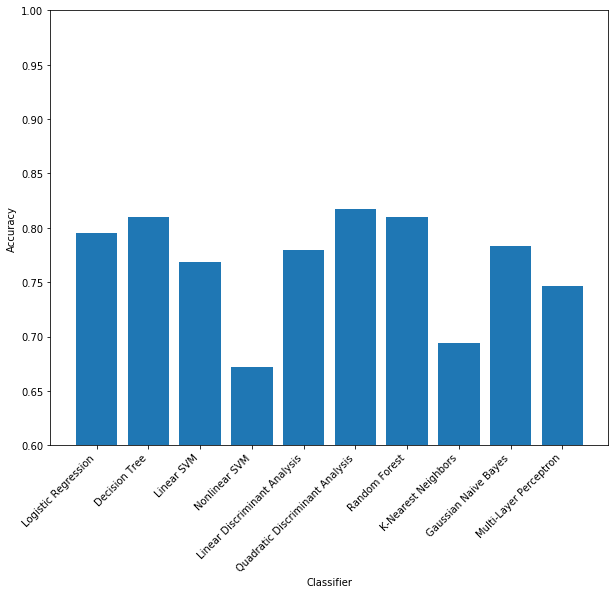

In [32]:
fig = pl.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.bar(np.arange(0, len(classifiers)), height=classifier_scores, align='center')
ax.set_ylim([0.6, 1.])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Classifier')
ax.set_xticks(np.arange(0, len(classifiers)))
ax.set_xticklabels(classifier_names, rotation = 45, ha="right")

## Computing ROC Curve and AUC - Area Under the Curve for Decision Tree

Text(0, 0.5, 'True positive rate')

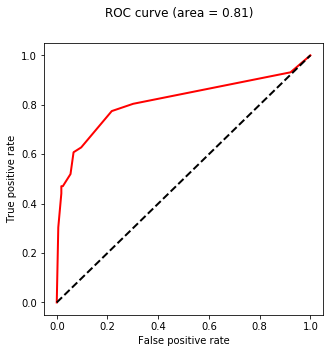

In [33]:
# For Decision Tree
from sklearn.metrics import roc_curve, auc

y_score = classifiers[1].predict_proba(X_test)

# Compute ROC curve and ROC area 
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_score[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

fig = pl.figure(figsize=(5, 5))
fig.suptitle('ROC curve (area = %0.2f)' % roc_auc)
ax = fig.add_subplot(111)
ax.plot(false_positive_rate, true_positive_rate, color='r', lw=2)
ax.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')

## Final Considerations
The first approach to this problem was to use exclusively the training dataset.

Why?
* Test set has no groundtruth
* Splitting a training set that is already small into 70/30 - training and test - didn't seem a good idea in the beginning (it would lead to a very small sample size)

What was done:
* First, the analysis was done regarding only the training set, without splitting the data. Although, we knew that this would cause the model to overfit and probably to not being able to generalize.
* Results were quite different:

In [34]:
classifier_scores = []
for clf, clf_id in zip(classifiers, classifier_names):
    clf.fit(train_data, target_labels)
    score = clf.score(train_data, target_labels)  #this would normally be done on the test set!
    print(clf_id, score)
    classifier_scores.append(score)

Logistic Regression 0.7991021324354658
Decision Tree 0.8417508417508418
Linear SVM 0.7867564534231201
Nonlinear SVM 0.9640852974186308
Linear Discriminant Analysis 0.7946127946127947
Quadratic Discriminant Analysis 0.8103254769921436
Random Forest 0.8439955106621774
K-Nearest Neighbors 0.8439955106621774
Gaussian Naive Bayes 0.792368125701459
Multi-Layer Perceptron 0.8170594837261503


[Text(0, 0, 'Logistic Regression'),
 Text(0, 0, 'Decision Tree'),
 Text(0, 0, 'Linear SVM'),
 Text(0, 0, 'Nonlinear SVM'),
 Text(0, 0, 'Linear Discriminant Analysis'),
 Text(0, 0, 'Quadratic Discriminant Analysis'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'K-Nearest Neighbors'),
 Text(0, 0, 'Gaussian Naive Bayes'),
 Text(0, 0, 'Multi-Layer Perceptron')]

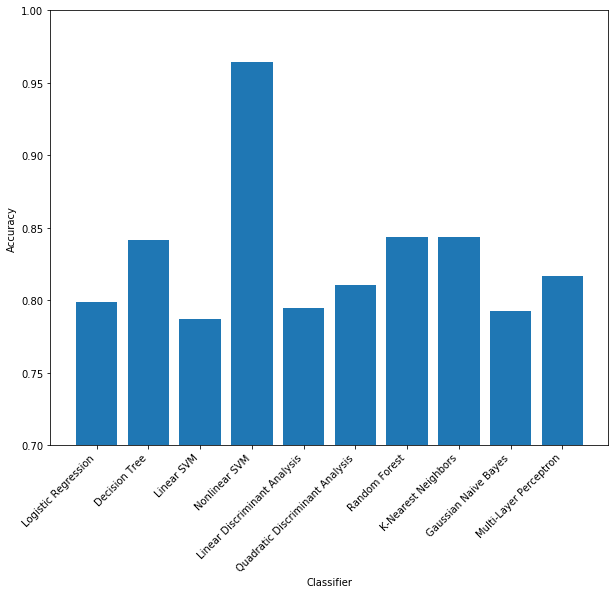

In [35]:
fig = pl.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.bar(np.arange(0, len(classifiers)), height=classifier_scores, align='center')
ax.set_ylim([0.7, 1.])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Classifier')
ax.set_xticks(np.arange(0, len(classifiers)))
ax.set_xticklabels(classifier_names, rotation = 45, ha="right")

Using the training set to train the models, Nonlinear SVM had the highest accuracy, and the models have remarkable accuracy scores (very likely because they're overfitting the training data and thus not generalizing so well).

## Computing ROC Curve and AUC - Area Under the Curve for Nonlinear SVM


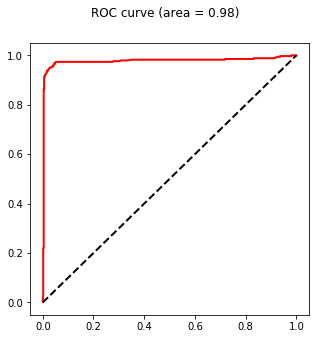

In [36]:
from sklearn.metrics import roc_curve, auc

y_score = classifiers[3].decision_function(train_data)

# Compute ROC curve and ROC area 
false_positive_rate, true_positive_rate, _ = roc_curve(target_labels, y_score)
roc_auc = auc(false_positive_rate, true_positive_rate)

fig = pl.figure(figsize=(5, 5))
fig.suptitle('ROC curve (area = %0.2f)' % roc_auc)
ax = fig.add_subplot(111)
ax.plot(false_positive_rate, true_positive_rate, color='r', lw=2)
ax.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')

## Cross Validation with K-Folding (K=10)

A more sensible approach to use only the training data and avoid the small sample size that would be the result of splitting it into train and test sets, we employed 10-fold cross validation over the training set.

"K-Fold CV is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point."

In [K-Fold Cross Validation](https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833)

In [37]:
from sklearn.model_selection import cross_validate

classifier_scores = []
classifier_error = []
for clf, clf_id in zip(classifiers, classifier_names):
    cv_results = cross_validate(clf, train_data, target_labels, cv=10)
    score = np.mean(cv_results['test_score'])  #this would normally be done on the test set!
    score_err = np.std(cv_results['test_score'])
    print(clf_id, score)
    classifier_scores.append(score)
    classifier_error.append(score_err)

Logistic Regression 0.7935413119963682
Decision Tree 0.8059635682669389
Linear SVM 0.7855870502780616
Nonlinear SVM 0.6474804221995233
Linear Discriminant Analysis 0.7912683009874021
Quadratic Discriminant Analysis 0.800283168766315
Random Forest 0.806051242764726
K-Nearest Neighbors 0.7274605606628078
Gaussian Naive Bayes 0.7857507660878447
Multi-Layer Perceptron 0.6938253319713994


[Text(0, 0, 'Logistic Regression'),
 Text(0, 0, 'Decision Tree'),
 Text(0, 0, 'Linear SVM'),
 Text(0, 0, 'Nonlinear SVM'),
 Text(0, 0, 'Linear Discriminant Analysis'),
 Text(0, 0, 'Quadratic Discriminant Analysis'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'K-Nearest Neighbors'),
 Text(0, 0, 'Gaussian Naive Bayes'),
 Text(0, 0, 'Multi-Layer Perceptron')]

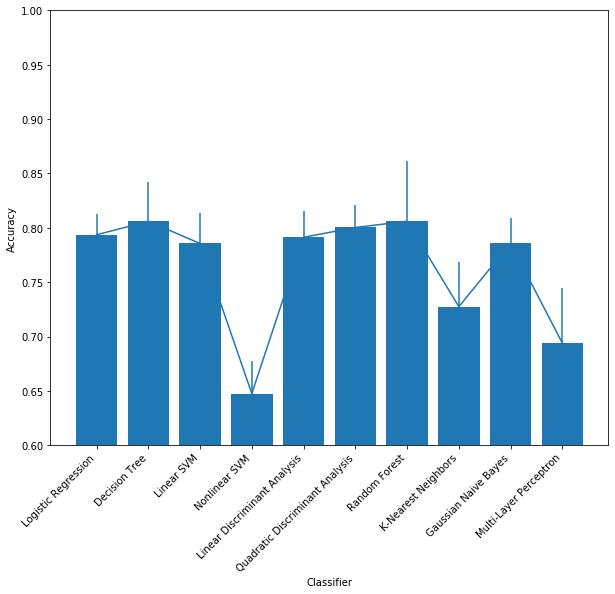

In [38]:
fig = pl.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.bar(np.arange(0, len(classifiers)), height=classifier_scores, align='center')
ax.errorbar(np.arange(0, len(classifiers)), y=classifier_scores, yerr=classifier_error, fmt='')
ax.set_ylim([0.6, 1.])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Classifier')
ax.set_xticks(np.arange(0, len(classifiers)))
ax.set_xticklabels(classifier_names, rotation = 45, ha="right")

With these 3 approachs, we can state that:

* Testing with the train dataset is a bad practice (overfitting and non-generalizing can occur easily)
* Splitting the train dataset doesn't produce very viable results, as the dataset itself is small
* K-Fold Cross-validation seems to be the best approach.


Decision Tree is the model with more accuracy, being Nonlinear SVM the less accurate.

## Checking the impact of a certain feature for Decision Tree

In [39]:
clf = classifiers[1] 

feature_impact = []
for remove_feature, feature in enumerate(clean_train_data.columns.values):
    mod_data = np.delete(train_data, np.s_[remove_feature], axis=1)
    score_normal = clf.fit(train_data, target_labels).score(train_data, target_labels)
    score_mod = clf.fit(mod_data, target_labels).score(mod_data, target_labels)
    #print(score_normal, score_mod)
    print("Impact of feature {0} = {1}".format(str(feature), str(score_normal-score_mod)))
    feature_impact.append(np.abs(score_normal-score_mod))

Impact of feature Pclass = 0.006734006734006703
Impact of feature Sex = 0.09652076318742986
Impact of feature Age = 0.007856341189674598
Impact of feature SibSp = 0.0
Impact of feature Parch = -0.001122334455667895
Impact of feature Fare = -0.010101010101010166
Impact of feature Embarked = 0.0


[Text(0, 0, 'Pclass'),
 Text(0, 0, 'Sex'),
 Text(0, 0, 'Age'),
 Text(0, 0, 'SibSp'),
 Text(0, 0, 'Parch'),
 Text(0, 0, 'Fare'),
 Text(0, 0, 'Embarked')]

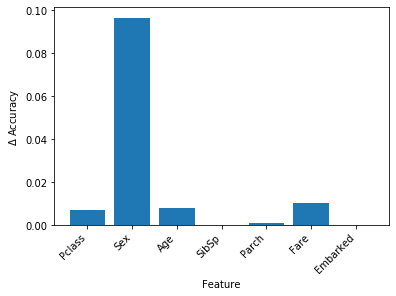

In [40]:
fig, ax = pl.subplots()
ax.bar(np.arange(0, len(clean_train_data.columns.values)), height=feature_impact, align='center')
ax.set_xlabel('Feature')
ax.set_ylabel(r'$\Delta$ Accuracy')
ax.set_xticks(np.arange(0, len(clean_train_data.columns.values)))
ax.set_xticklabels(clean_train_data.columns.values, rotation = 45, ha="right")

In line with the results obtained in the correlation analysis, the feature with the highest predictive capability was the passenger's gender.